In [1]:
import pandas as pd

In [2]:
# считаем описание данных
df = pd.read_csv('02_otp_desc.csv', sep=';').loc[:,'ПОЛЕ':'ОПИСАНИЕ']

In [3]:
df.head()

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,TARGET,целевая переменная:отклик на маркетинговую кам...
2,AGE,возраст клиента
3,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
4,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...


In [4]:
# считаем все-все данные

In [5]:
train = pd.read_csv('02_otp_train.csv', sep=';')
train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


In [6]:
train.shape

(15223, 52)

In [7]:
test = pd.read_csv('02_otp_test.csv', sep=';')
test.head()

,AGREEMENT_RK,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59909969,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,Образование,...,0,1,2,2,8,0,0,0,0,NaN
1,59910420,48,0,1,1,0,0,Среднее,Состою в браке,NaN,...,0,0,2,1,15,0,0,0,0,NaN
2,59911223,35,1,0,0,1,0,Среднее,Не состоял в браке,Металлургия/Промышленность/Машиностроение,...,0,1,1,1,1,0,0,0,0,NaN
3,59911322,22,1,0,0,0,0,Среднее,Не состоял в браке,Другие сферы,...,0,1,3,2,9,0,0,0,0,NaN
4,59911438,27,1,0,1,2,2,Высшее,Состою в браке,Образование,...,0,1,1,1,5,0,0,0,0,NaN


In [8]:
test.shape

(14910, 51)

In [9]:
# отделим таргет от TRAIN-а

In [10]:
y = train['TARGET']

In [11]:
train = train.drop('TARGET', axis=1)

In [12]:
# соеденим train и test

In [13]:
all_data = pd.concat([train, test])

In [14]:
# необходимо удалить индекс, 
# у нас есть 0-строка в train и 0-строка в test (и так далее 1,2,3,4)
# если мы просто объеденим - у нас сохранятся индексы
# мы же просто уберем индекс и автоматически создастся новый индекс, сквозной и уникальный
all_data = all_data.reset_index(drop=True) 

In [15]:
all_data

,AGREEMENT_RK,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,39,1,0,1,1,1,Высшее,Состою в браке,Образование,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,...,0,1,2,1,16,2,1,"1152,15",2230,NaN
5,59911784,29,1,0,0,0,0,Среднее,Гражданский брак,Торговля,...,0,1,2,1,11,0,0,0,0,NaN
6,59911832,35,1,0,0,1,1,Высшее,Разведен(а),Другие сферы,...,0,1,2,2,14,0,0,0,0,NaN
7,59912034,41,1,0,1,0,0,Среднее,Состою в браке,Сельское хозяйство,...,1,1,2,1,11,0,0,0,0,NaN
8,59912560,53,1,0,0,2,0,Высшее,Состою в браке,Здравоохранение,...,0,1,1,1,3,0,0,0,0,NaN
9,59912659,43,1,0,1,0,0,Среднее специальное,Состою в браке,Образование,...,0,1,1,1,6,0,0,0,0,NaN


In [16]:
# посмотрим типы данных и их заполняемость

In [17]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_P

In [18]:
# Видим, что часть данных - object, скорее всего стоки.
# Давайте выведем эти значения для каждого столбца

In [19]:
for i in all_data.columns: # перебираем все столбцы
    if str(all_data[i].dtype) == 'object': # если тип столбца - object
        print(i) # выводим название столбца
        print(set(all_data[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print() # выводим пустую строку

EDUCATION
{'Неполное среднее', 'Среднее специальное', 'Среднее', 'Высшее', 'Ученая степень', 'Неоконченное высшее', 'Два и более высших образования'}

MARITAL_STATUS
{'Вдовец/Вдова', 'Не состоял в браке', 'Гражданский брак', 'Разведен(а)', 'Состою в браке'}

GEN_INDUSTRY
{nan, 'Металлургия/Промышленность/Машиностроение', 'Информационные услуги', 'Развлечения/Искусство', 'Коммунальное хоз-во/Дорожные службы', 'СМИ/Реклама/PR-агенства', 'ЧОП/Детективная д-ть', 'Нефтегазовая промышленность', 'Торговля', 'Энергетика', 'Недвижимость', 'Туризм', 'Образование', 'Маркетинг', 'Салоны красоты и здоровья', 'Сельское хозяйство', 'Государственная служба', 'Логистика', 'Здравоохранение', 'Транспорт', 'Строительство', 'Сборочные производства', 'Подбор персонала', 'Юридические услуги/нотариальные услуги', 'Управляющая компания', 'Наука', 'Банк/Финансы', 'Другие сферы', 'Информационные технологии', 'Страхование', 'Химия/Парфюмерия/Фармацевтика', 'Ресторанный бизнес/Общественное питание'}

GEN_TITLE
{na

In [20]:
# можно заметить что некоторые переменные, 
# которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа,
# но по какой-то (ниже увидим) причине были распознаны как строки

In [21]:
all_data['PERSONAL_INCOME'] = all_data['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [22]:
# причина же что использовалась запятая для разделения не целой части числа

In [23]:
all_data['CREDIT'] = all_data['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['FST_PAYMENT'] = all_data['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_AVG_DLQ_AMT'] = all_data['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_MAX_DLQ_AMT'] = all_data['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [24]:
# запускаем повторно код и смотрим, какие столбцы с какими строковыми значениями остались

In [25]:
for i in all_data.columns:
    if str(all_data[i].dtype) == 'object':
        print(i)
        print(set(all_data[i]))
        print()

EDUCATION
{'Неполное среднее', 'Среднее специальное', 'Среднее', 'Высшее', 'Ученая степень', 'Неоконченное высшее', 'Два и более высших образования'}

MARITAL_STATUS
{'Вдовец/Вдова', 'Не состоял в браке', 'Гражданский брак', 'Разведен(а)', 'Состою в браке'}

GEN_INDUSTRY
{nan, 'Металлургия/Промышленность/Машиностроение', 'Информационные услуги', 'Развлечения/Искусство', 'Коммунальное хоз-во/Дорожные службы', 'СМИ/Реклама/PR-агенства', 'ЧОП/Детективная д-ть', 'Нефтегазовая промышленность', 'Торговля', 'Энергетика', 'Недвижимость', 'Туризм', 'Образование', 'Маркетинг', 'Салоны красоты и здоровья', 'Сельское хозяйство', 'Государственная служба', 'Логистика', 'Здравоохранение', 'Транспорт', 'Строительство', 'Сборочные производства', 'Подбор персонала', 'Юридические услуги/нотариальные услуги', 'Управляющая компания', 'Наука', 'Банк/Финансы', 'Другие сферы', 'Информационные технологии', 'Страхование', 'Химия/Парфюмерия/Фармацевтика', 'Ресторанный бизнес/Общественное питание'}

GEN_TITLE
{na

# Данные готовы, теперь вам предлагается начать решать задачу

In [26]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_

In [27]:
# Есть ли пропуски в данных? что с ними сделать?

# Ваш код :-)
#all_data = all_data[~all_data['GEN_INDUSTRY'].isnull()]
#all_data = all_data[~all_data['ORG_TP_FCAPITAL'].isnull()]
#all_data = all_data[~all_data['TP_PROVINCE'].isnull()]
#all_data = all_data[~all_data['WORK_TIME'].isnull()]

#all_data = all_data[~all_data['PREVIOUS_CARD_NUM_UTILIZED'].isnull()]


#all_data = all_data.drop(['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL','JOB_DIR','TP_PROVINCE','REGION_NM','WORK_TIME'], axis=1)


In [28]:
all_data.WORK_TIME = all_data.WORK_TIME.fillna(0)

In [29]:
all_data.PREVIOUS_CARD_NUM_UTILIZED = all_data.PREVIOUS_CARD_NUM_UTILIZED.fillna(0)

In [30]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_

In [31]:
# Как поступить со строковыми переменными?

# Ваш код :-)
all_data = all_data.drop(['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','FAMILY_INCOME','REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','TP_PROVINCE','REGION_NM','POSTAL_ADDRESS_PROVINCE'], axis=1)

In [32]:
# В итоге должны получиться данные без пропусков и только числовые
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 38 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
PERSONAL_INCOME               30133 non-null float64
REG_FACT_FL                   30133 non-null int64
FACT_POST_FL                  30133 non-null int64
REG_POST_FL                   30133 non-null int64
REG_FACT_POST_FL              30133 non-null int64
REG_FACT_POST_TP_FL           30133 non-null int64
FL_PRESENCE_FL                30133 non-null int64
OWN_AUTO                      30133 non-null int64
AUTO_RUS_FL                   30133 non-null int64
HS_PRESENCE_FL                30133 non-null int64
COT_PRESENCE_FL       

In [33]:
# Вновь разделите на train и test (не мешая)

# Ваш код :-)
train=all_data.iloc [:15223]
train

,AGREEMENT_RK,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,49,1,0,1,2,1,5000.0,1,1,...,0,1,1,1,6,2,1,1580.000000,1580.00,0.0
1,59910230,32,1,0,1,3,3,12000.0,1,1,...,0,1,1,1,6,1,1,4020.000000,4020.00,0.0
2,59910525,52,1,0,1,4,0,9000.0,1,1,...,0,1,2,1,11,0,0,0.000000,0.00,0.0
3,59910803,39,1,0,1,1,1,25000.0,0,1,...,1,1,1,1,6,3,1,1589.923333,1590.00,0.0
4,59911781,30,1,0,0,0,0,12000.0,1,1,...,0,1,2,1,16,2,1,1152.150000,2230.00,0.0
5,59911784,29,1,0,0,0,0,12000.0,1,1,...,0,1,2,1,11,0,0,0.000000,0.00,0.0
6,59911832,35,1,0,0,1,1,15000.0,1,1,...,0,1,2,2,14,0,0,0.000000,0.00,0.0
7,59912034,41,1,0,1,0,0,6000.0,1,1,...,1,1,2,1,11,0,0,0.000000,0.00,0.0
8,59912560,53,1,0,0,2,0,100000.0,1,1,...,0,1,1,1,3,0,0,0.000000,0.00,0.0
9,59912659,43,1,0,1,0,0,7000.0,1,1,...,0,1,1,1,6,0,0,0.000000,0.00,0.0


In [34]:
train.shape

(15223, 38)

In [35]:
test=all_data.iloc [-14910:]
test.head()

,AGREEMENT_RK,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
15223,59909969,30,1,0,1,1,1,7000.0,0,1,...,0,1,2,2,8,0,0,0.0,0.0,0.0
15224,59910420,48,0,1,1,0,0,4100.0,1,1,...,0,0,2,1,15,0,0,0.0,0.0,0.0
15225,59911223,35,1,0,0,1,0,40000.0,1,1,...,0,1,1,1,1,0,0,0.0,0.0,0.0
15226,59911322,22,1,0,0,0,0,20000.0,1,1,...,0,1,3,2,9,0,0,0.0,0.0,0.0
15227,59911438,27,1,0,1,2,2,17000.0,1,1,...,0,1,1,1,5,0,0,0.0,0.0,0.0


In [36]:
test.shape

(14910, 38)

In [37]:
# Сделать hold-out sampling на train выборке
from sklearn.cross_validation import train_test_split

# test_size=0.3, random_state=42

# Ваш код :-)
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
#y
X_train.shape

(10656, 38)

In [39]:
X_test.shape

(4567, 38)

In [40]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Ваш код :-)
dtc = DecisionTreeClassifier() #создание объекта класса - дерево принятия решения
dtc.fit(X_train, y_train) # fit - обучаем машину, передаем dataframe, y - ответы
predict = dtc.predict(X_test)# предсказания
predict

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

# tree

In [41]:
# Посчитать метрики стандартные
# accuracy, precision, recall
from sklearn.metrics import accuracy_score
accuracy_score (y_test,predict)
# Ваш код :-)

0.78760674403328224

In [42]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, predict)


0.19076005961251863

In [43]:
recall_score(y_test, predict)

0.23063063063063063

In [44]:
print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))

precision 0.190760059613
recall 0.230630630631
accuracy 0.787606744033


# randomforest

In [45]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict2 = rfc.predict(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))

precision 0.190760059613
recall 0.230630630631
accuracy 0.787606744033


# predict proba

In [46]:
#rfc = RandomForestClassifier()
#rfc.fit(X_train, y_train)
#predict3 = rfc.predict_proba(X_test)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict_dtc_proba = dtc.predict_proba(X_test)

#print('precision', precision_score(y_test, predict [:,1]))
#print('recall', recall_score(y_test, predict[:,1]))
#print('accuracy', accuracy_score(y_test, predict [:,1]))

In [47]:
predict_dtc_proba [:,1]

array([ 0.,  0.,  1., ...,  0.,  0.,  0.])

In [51]:
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import roc_auc_score, roc_curve

precision_dtc_proba, recall_dtc_proba, thresholds_dtc_proba = precision_recall_curve(y_test, predict_dtc_proba[:, 1])


In [52]:
roc_auc_score(y_test, predict_dtc_proba[:,1])

0.5538640834253995

проба для randomforest

In [53]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_rfc_proba = rfc.predict_proba(X_test)

In [54]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve

precision_rfc_proba, recall_rfc_proba, thresholds_rfc_proba = precision_recall_curve(y_test, predict_rfc_proba[:, 1])


проба для регрессии

In [57]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_lr_proba = lr.predict_proba(X_test)

In [58]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve

precision_lr_proba, recall_lr_proba, thresholds_lr_proba = precision_recall_curve(y_test, predict_lr_proba[:, 1])

(-0.01, 1.01)

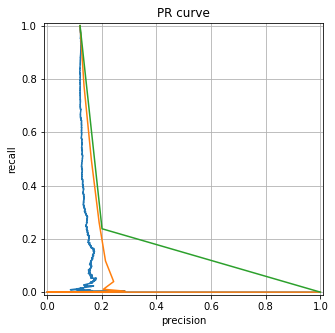

In [60]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 5))

plt.plot(precision_lr_proba, recall_lr_proba)
plt.plot(precision_rfc_proba, recall_rfc_proba)
plt.plot(precision_dtc_proba, recall_dtc_proba)

plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

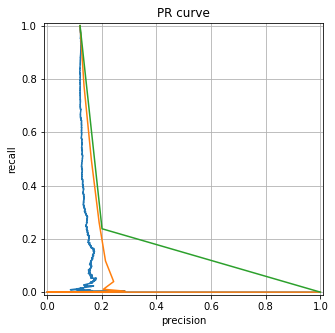

In [61]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

# Ваш код :-)
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 5))

plt.plot(precision_lr_proba, recall_lr_proba)
plt.plot(precision_rfc_proba, recall_rfc_proba)
plt.plot(precision_dtc_proba, recall_dtc_proba)

plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [67]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

# Ваш код :-)
print ('rfc',roc_auc_score(y_test, predict_rfc_proba[:,1]))
print ('lr',roc_auc_score(y_test, predict_lr_proba[:,1]))
print ('rfc',roc_auc_score(y_test, predict_dtc_proba[:,1]))

rfc 0.588803409591
lr 0.525281812221
rfc 0.553864083425


(-0.01, 1.01)

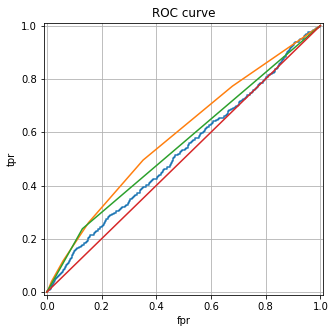

In [74]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_lr_proba[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict_rfc_proba[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, predict_dtc_proba[:,1])

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot(fpr2, tpr2)
plt.plot(fpr3, tpr3)

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [76]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

# Ваш код :-)


In [80]:
train.shape

(15223, 38)

In [82]:
rfc = RandomForestClassifier()
cross_val_score(
    rfc,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10
)

array([ 0.62939041,  0.61174434,  0.62354357,  0.59954829,  0.59084769,
        0.5467283 ,  0.59289092,  0.57271915,  0.5596383 ,  0.54324175])

In [83]:
lr = LogisticRegression()
cross_val_score(
    rfc,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10
)

array([ 0.5805049 ,  0.65751013,  0.59600642,  0.58119723,  0.65515029,
        0.6138129 ,  0.57628757,  0.55954894,  0.59982979,  0.58056656])

In [93]:
dtc = DecisionTreeClassifier()
cross_val_score(
    rfc,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10
)

array([ 0.6245103 ,  0.59142182,  0.57535039,  0.58107058,  0.58971209,
        0.60800827,  0.61041878,  0.60545532,  0.59114468,  0.57047497])

In [94]:
roc_auc_score(y_test, predict_dtc_proba[:,1]), roc_auc_score(y_test, predict_lr_proba[:,1]),roc_auc_score(y_test, predict_rfc_proba[:,1])

(0.5538640834253995, 0.52528181222099468, 0.58880340959104671)

In [110]:
lr_roc_auc = roc_auc_score(y_test, predict_lr_proba[:,1])
dtc_roc_auc=roc_auc_score(y_test, predict_dtc_proba[:,1])
rfc_roc_proba=roc_auc_score(y_test, predict_rfc_proba[:,1])

лучшая модель RFC

In [121]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

# Ваш код :-)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_rfc_proba_final = rfc.predict_proba(test)
predict_rfc_proba_final

array([[ 0.9,  0.1],
       [ 0.9,  0.1],
       [ 0.9,  0.1],
       ..., 
       [ 0.8,  0.2],
       [ 1. ,  0. ],
       [ 0.7,  0.3]])

In [122]:
predict_rfc_proba_final.shape

(14910, 2)